In [ ]:
#import ignores
import warnings
warnings.filterwarnings('ignore')

In [1]:
#import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

## 1- Reading and understanding data

In [2]:
# Read the data from csv file
df = pd.read_csv('day.csv')
# check dataset head
print(df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [3]:
#dataframe shape (rows,column)
df.shape

(730, 16)

In [ ]:
# get dataframe details
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [ ]:
#get dataframe description (count,mean,min,max,..etc)
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
#get list of unique variables in each column
print(df.nunique())

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64


## 2- data preparation and cleaning

In [ ]:
#checking if there is missing values
print(df.apply(lambda x: x.count(), axis=0))

## there in no missing values in this data set

instant       730
dteday        730
season        730
yr            730
mnth          730
holiday       730
weekday       730
workingday    730
weathersit    730
temp          730
atemp         730
hum           730
windspeed     730
casual        730
registered    730
cnt           730
dtype: int64


In [ ]:
 #renaming some of the columns for better readibility
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)


In [ ]:
df.rename(columns={'cnt':'count'}, inplace=True)

In [ ]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
temp=df.copy()
temp.shape

(730, 16)

In [ ]:
# dropping the duplicates

temp.drop_duplicates(inplace=True)
temp.shape
## by running this we conclude that there is no duplication in this dataframe

(730, 16)

In [ ]:
#dropping columns that is not affecting
# instant column is incremental numbers defining the row index which has no significance for our target
df.drop(['instant'],axis=1,inplace=True)

In [ ]:
#dteday is useful as month and weekday are covering it
df.drop(['dteday'],axis=1,inplace=True)

#_________
#Removing casual and registered as cnt is sum of these 2 columns
df.drop(['casual'],axis=1,inplace=True)
df.drop(['registered'],axis=1,inplace=True)

In [ ]:
df.corr()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
year,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
month,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


from the data frame correlation , we can see that some of the columns like month and season should not be numeric, we can convert those value to names(strings)

In [ ]:
#changing primarily numeric data (categorical) to more readable one
#changing seasons numerics into string values (mapping and decoding)
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

In [ ]:
df.month = df.month.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

In [ ]:
#changing weekdays numerics into string values (mapping and decoding)
df.weekday =df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [ ]:
#changing weatherlist numerics into string values (mapping and decoding)
df.weathersit.replace({1:'clear',2:'moderate',3:'bad',4:'severe'},inplace = True)

In [ ]:
##checking the changes
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## 3- data visualizing

<Figure size 2000x3000 with 0 Axes>

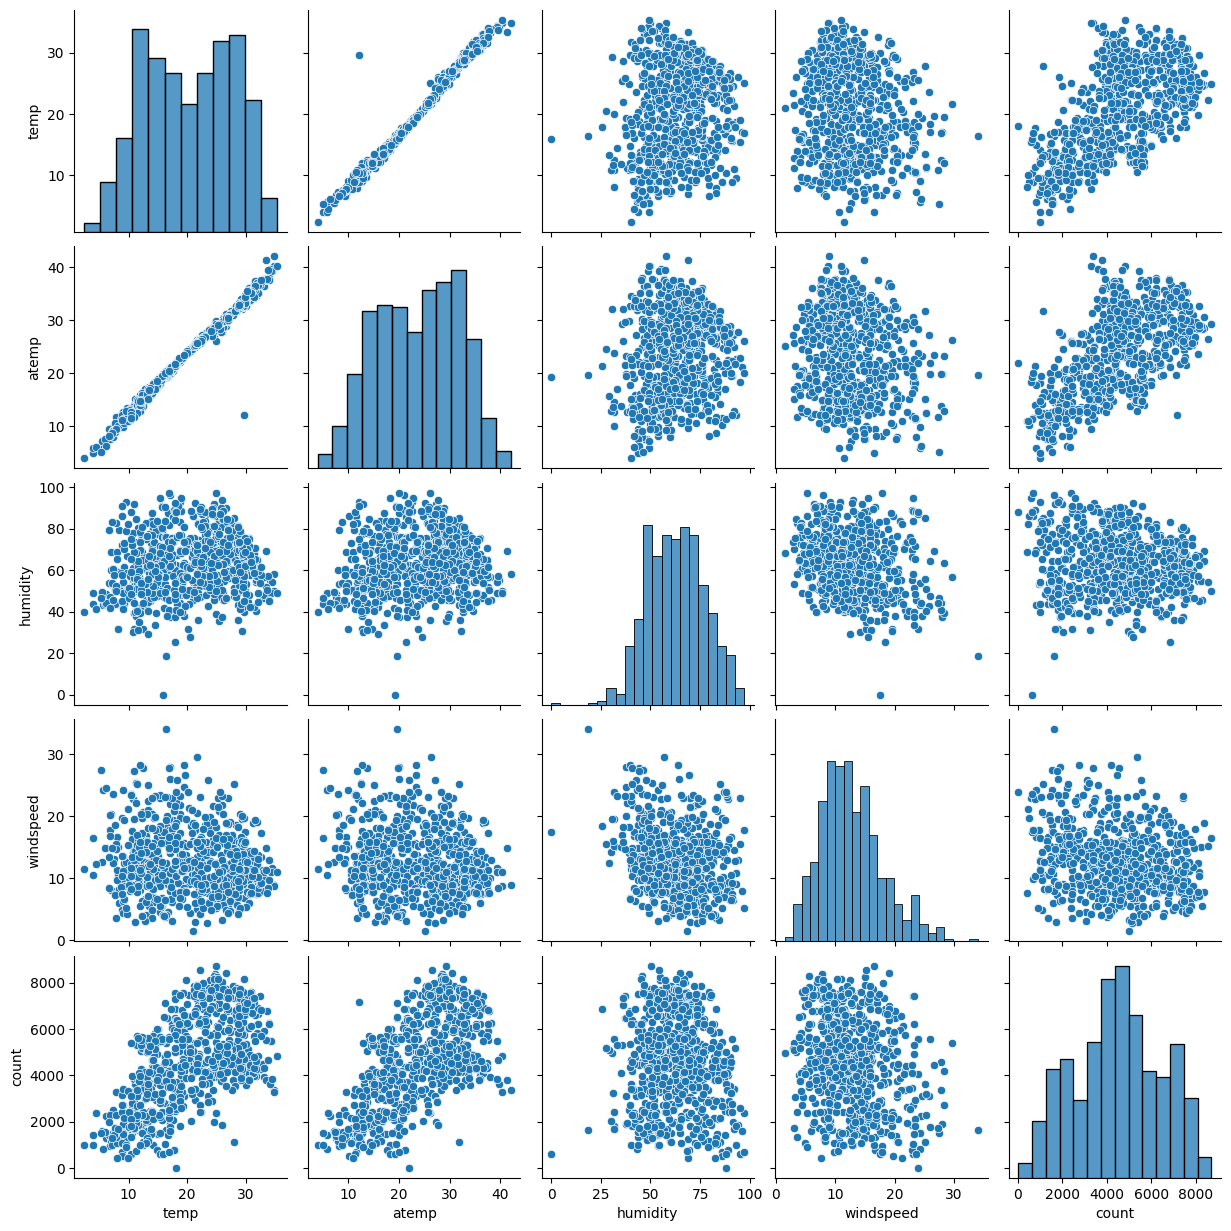

In [ ]:
plt.figure(figsize = (20,30))
sns.pairplot(data=df,vars=['temp', 'atemp', 'humidity','windspeed','count'])
plt.show()

important note: from the above plot we can clearly see that temp and atemp are having high coleration , and there is a linear relationship between temp and atemp

<Figure size 2000x1500 with 0 Axes>

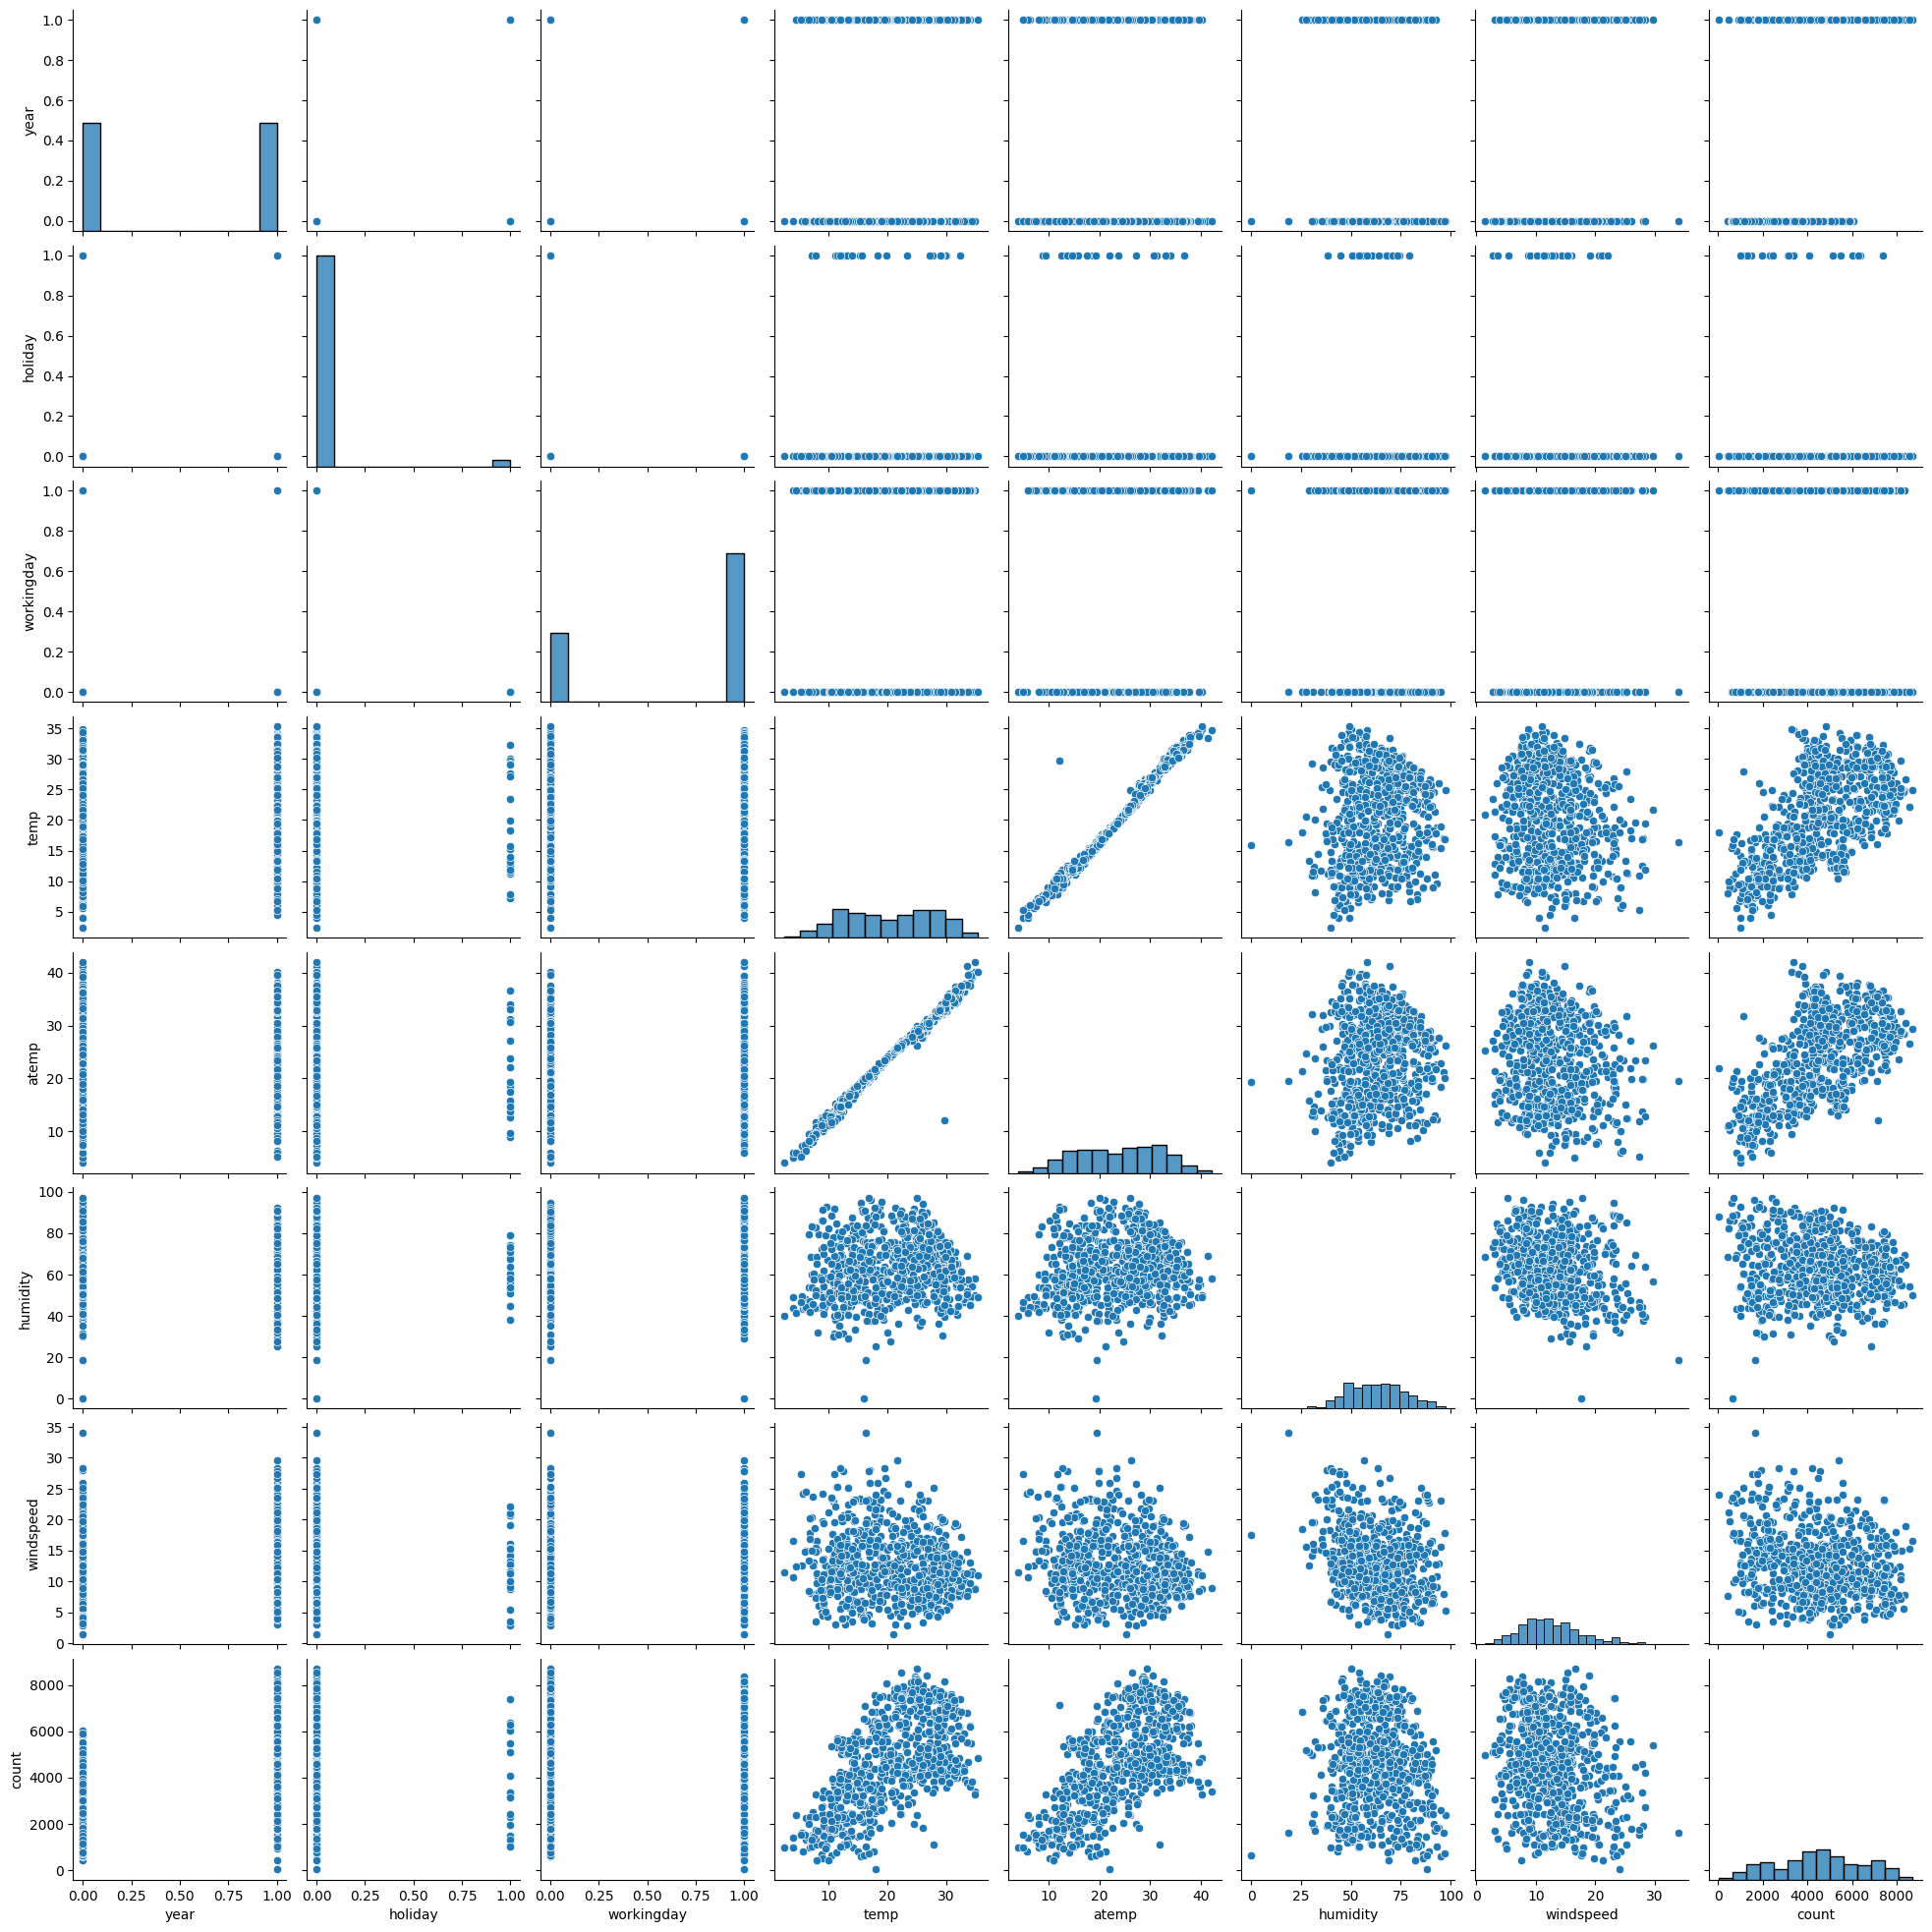

In [ ]:
plt.figure(figsize=(20,15))
sns.pairplot(df)
plt.show()

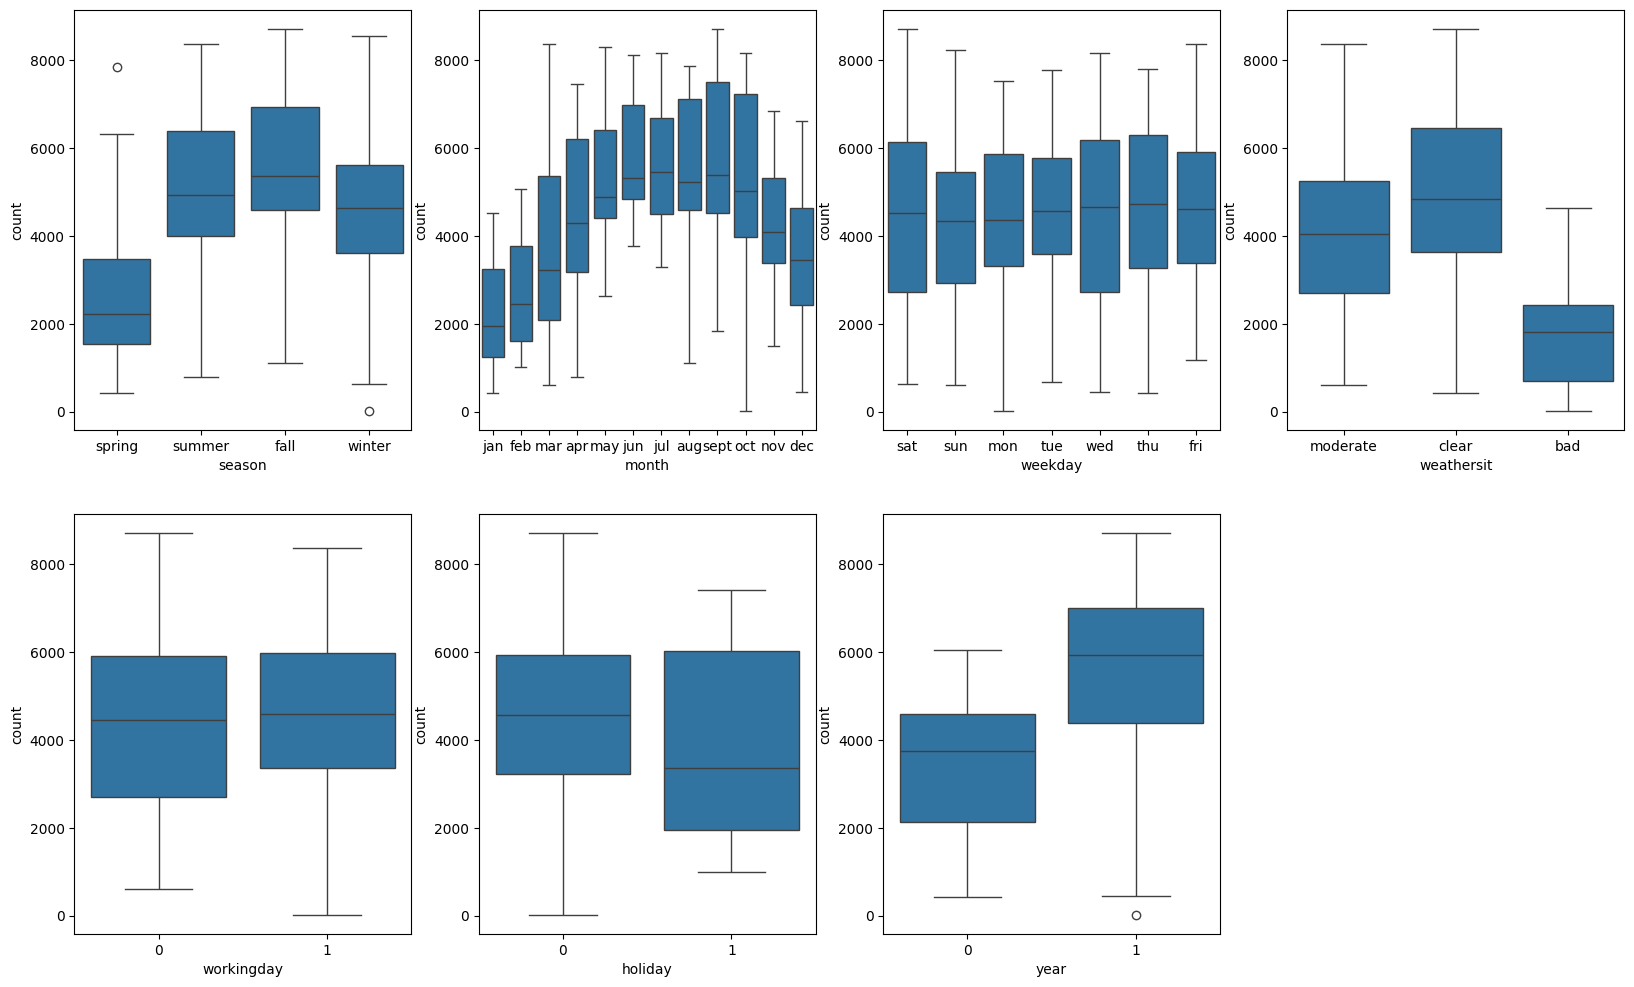

In [ ]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'count', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'count', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'count', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'count', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'holiday', y = 'count', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'count', data = df)
plt.show()

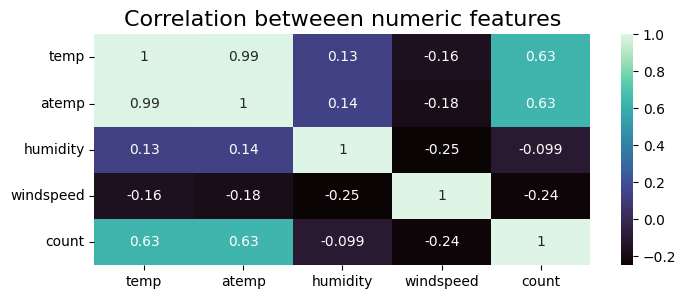

In [ ]:
num_features = ["temp","atemp","humidity","windspeed","count"]
plt.figure(figsize=(8,3),dpi=100)
plt.title("Correlation betweeen numeric features",fontsize=16)
sns.heatmap(df[num_features].corr(),annot= True,cmap="mako")
plt.show()

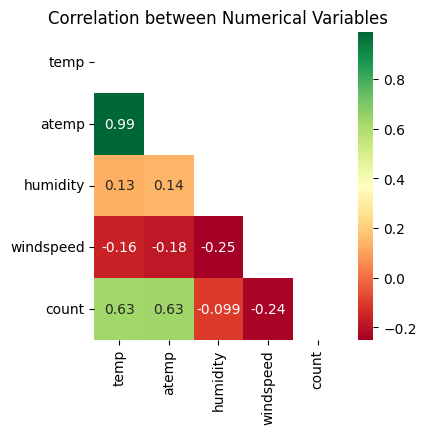

In [ ]:
plt.figure(figsize = (4,4))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','count']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','count']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

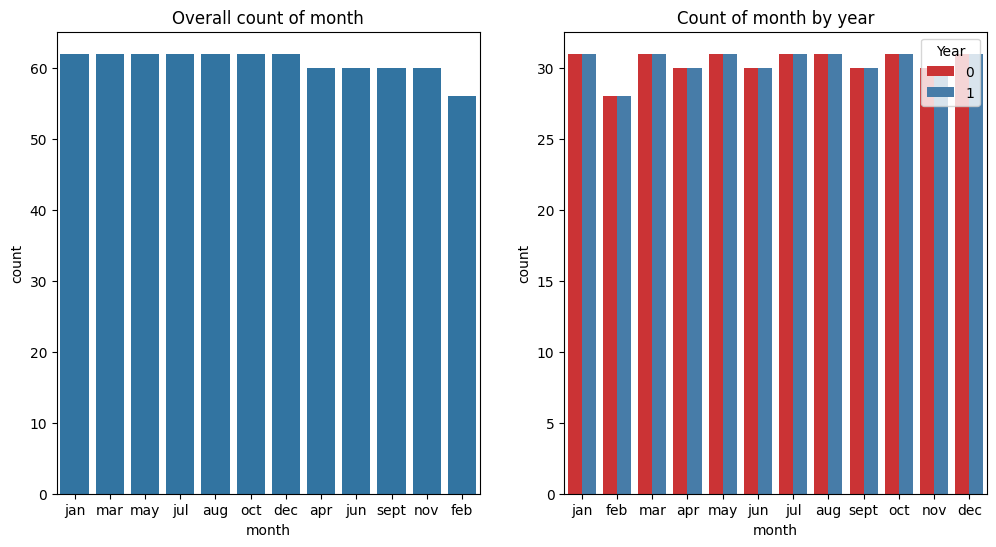

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

def plot_cat_columns(column):
    plt.figure(figsize=(12,6))

    # First subplot: Overall count of categories
    plt.subplot(1,2,1)
    count_data = df[column].value_counts().reset_index()
    count_data.columns = [column, 'count']
    sns.barplot(x=column, y='count', data=count_data)
    plt.title(f'Overall count of {column}')

    # Second subplot: Count of categories by year
    plt.subplot(1,2,2)
    sns.countplot(x=column, hue='year', data=df, palette='Set1')
    plt.title(f'Count of {column} by year')

    plt.legend(title='Year')
    plt.show()

# Plotting visualization for month column
plot_cat_columns('month')


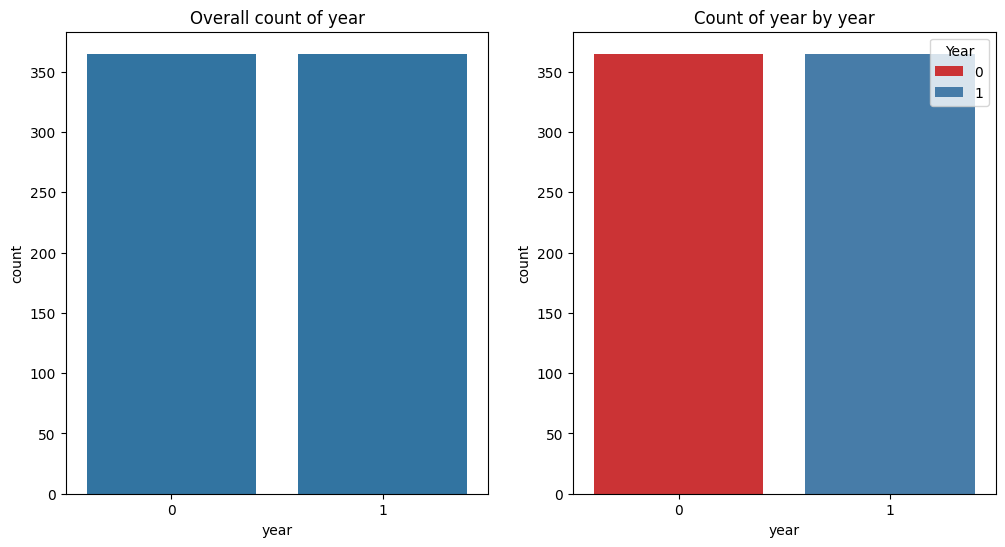

In [ ]:
# plotting visualization for year column

plot_cat_columns('year')

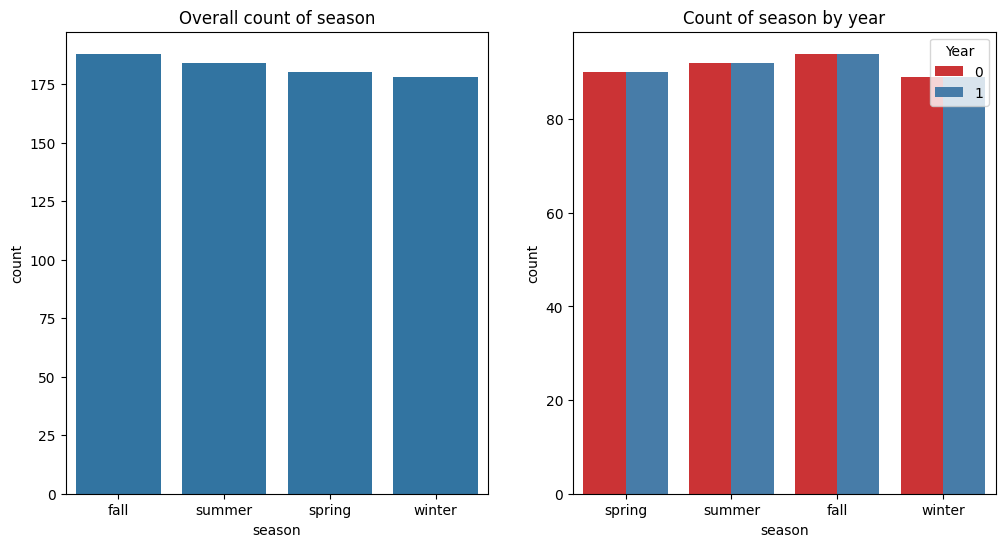

In [ ]:
# plotting visualization for season column

plot_cat_columns('season')

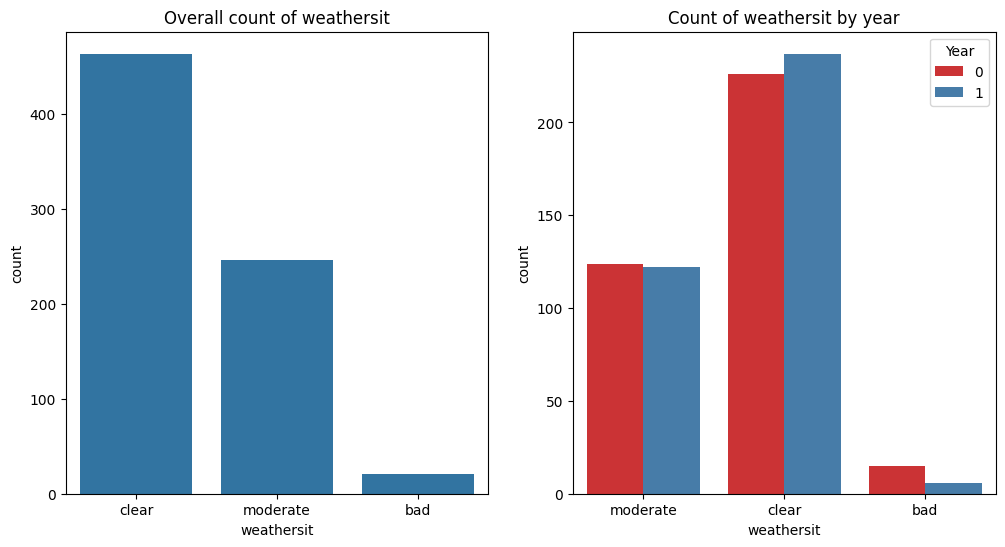

In [ ]:
# plotting visualization for weather category column

plot_cat_columns('weathersit')

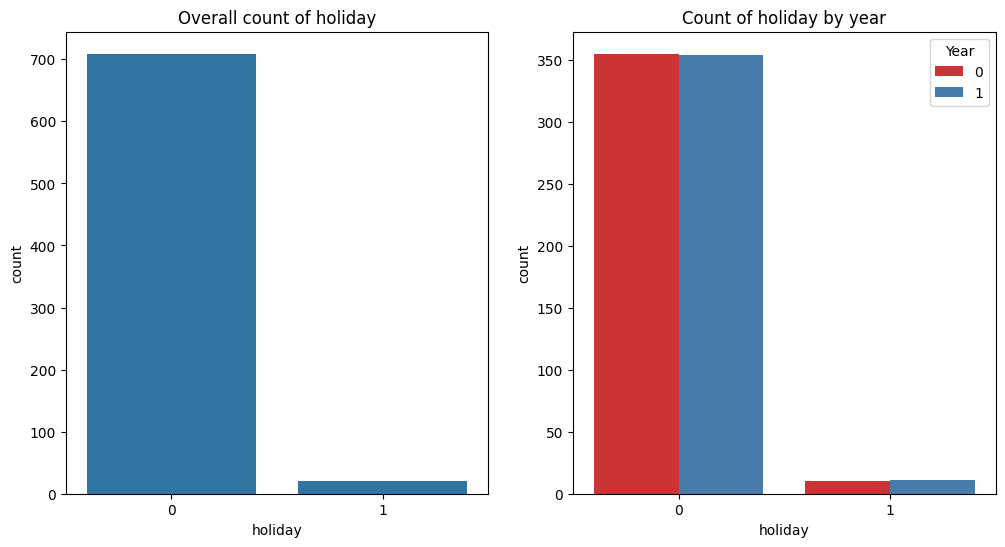

In [ ]:
# plotting visualization for holdiday column

plot_cat_columns('holiday')

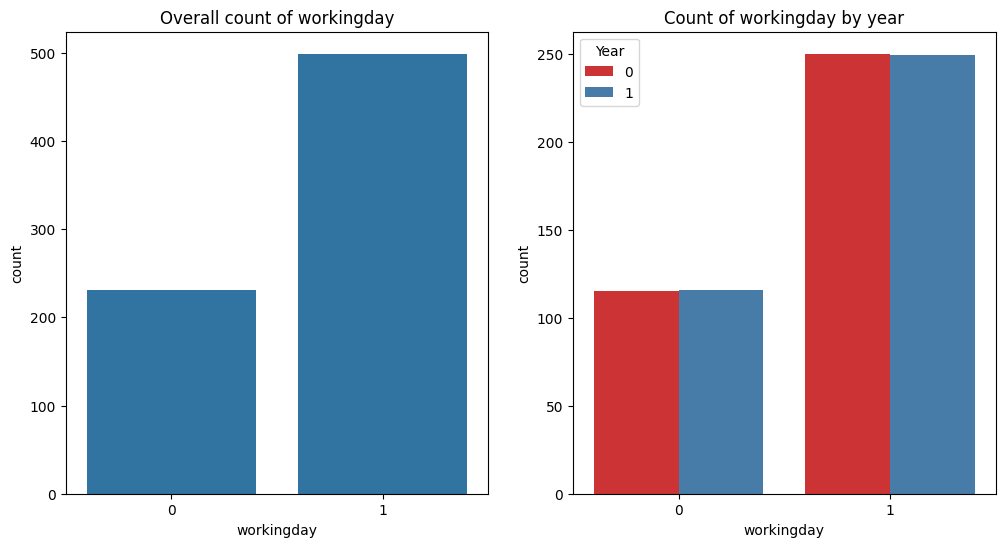

In [ ]:
# plotting visualization for working day column

plot_cat_columns('workingday')

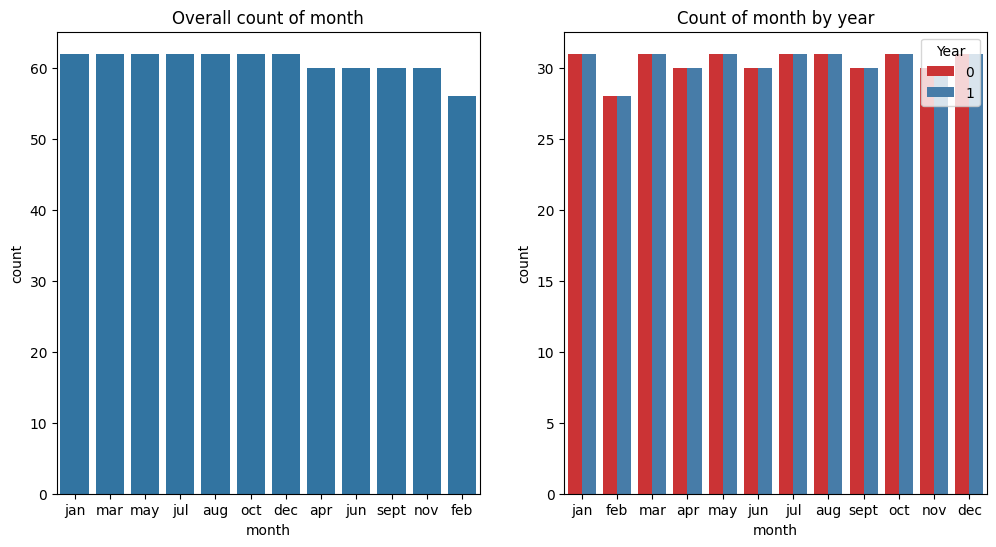

In [ ]:
# plotting visualization for month column

plot_cat_columns('month')

## 4- Data preparation for building linar regression model


In [ ]:
#first get dummies for each column
# df_new = pd.get_dummies(data=df,columns=["season","month","weekday"],drop_first=True)
df_weather = pd.get_dummies(data=df,columns=["weathersit"],drop_first=True)
df_season = pd.get_dummies(data=df,columns=["season"],drop_first=True)
df_month = pd.get_dummies(data=df,columns=["month"],drop_first=True)
df_weekday = pd.get_dummies(data=df,columns=["weekday"],drop_first=True)

In [ ]:
df_season.columns

Index(['year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'humidity', 'windspeed', 'count', 'season_spring',
       'season_summer', 'season_winter'],
      dtype='object')

In [ ]:
df_new = pd.concat([df,df_month,df_weekday,df_weather,df_season],axis=1)

In [ ]:
df_new.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'count',
       'season', 'year', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'humidity', 'windspeed', 'count', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sept',
       'season', 'year', 'month', 'holiday', 'workingday', 'weathersit',
       'temp', 'atemp', 'humidity', 'windspeed', 'count', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'count',
       'weathersit_clear', 'weathersit_moderate', 'year', 'month', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'humidity',
       'windspeed', 'count', 'season_spring', 'season_summ

In [ ]:
#check if dummies is created
df_new.shape

(730, 78)

In [ ]:
# Remove duplicate columns
df_new = df_new.loc[:, ~df_new.columns.duplicated()]

In [ ]:
df_new.shape

(730, 34)

In [ ]:
df_new.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'count',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_clear',
       'weathersit_moderate', 'season_spring', 'season_summer',
       'season_winter'],
      dtype='object')

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               730 non-null    object 
 1   year                 730 non-null    int64  
 2   month                730 non-null    object 
 3   holiday              730 non-null    int64  
 4   weekday              730 non-null    object 
 5   workingday           730 non-null    int64  
 6   weathersit           730 non-null    object 
 7   temp                 730 non-null    float64
 8   atemp                730 non-null    float64
 9   humidity             730 non-null    float64
 10  windspeed            730 non-null    float64
 11  count                730 non-null    int64  
 12  month_aug            730 non-null    bool   
 13  month_dec            730 non-null    bool   
 14  month_feb            730 non-null    bool   
 15  month_jan            730 non-null    boo

In [ ]:
# dropping columns that already created dummy for
df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [ ]:
df_new.shape

(730, 30)

## 5- splitting data for training and testing data

In [ ]:
# splitting the dataframe into Train and Test
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [ ]:
# check the shape of training datatset

df_train.shape

(510, 30)

In [ ]:
# check the shape of testing datatset

df_test.shape

(220, 30)

In [ ]:
 #Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [ ]:
# verifying the head of dataset before scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_moderate,season_spring,season_summer,season_winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,False,False,...,False,False,False,True,False,True,False,False,False,False
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,False,True,...,False,True,False,False,False,True,False,True,False,False
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,False,False,...,True,False,False,False,False,False,True,False,True,False
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,False,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
# verifying the head after appying scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_moderate,season_spring,season_summer,season_winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,False,...,False,False,False,True,False,True,False,False,False,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,False,True,...,False,True,False,False,False,True,False,True,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,False,...,True,False,False,False,False,False,True,False,True,False
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,False,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


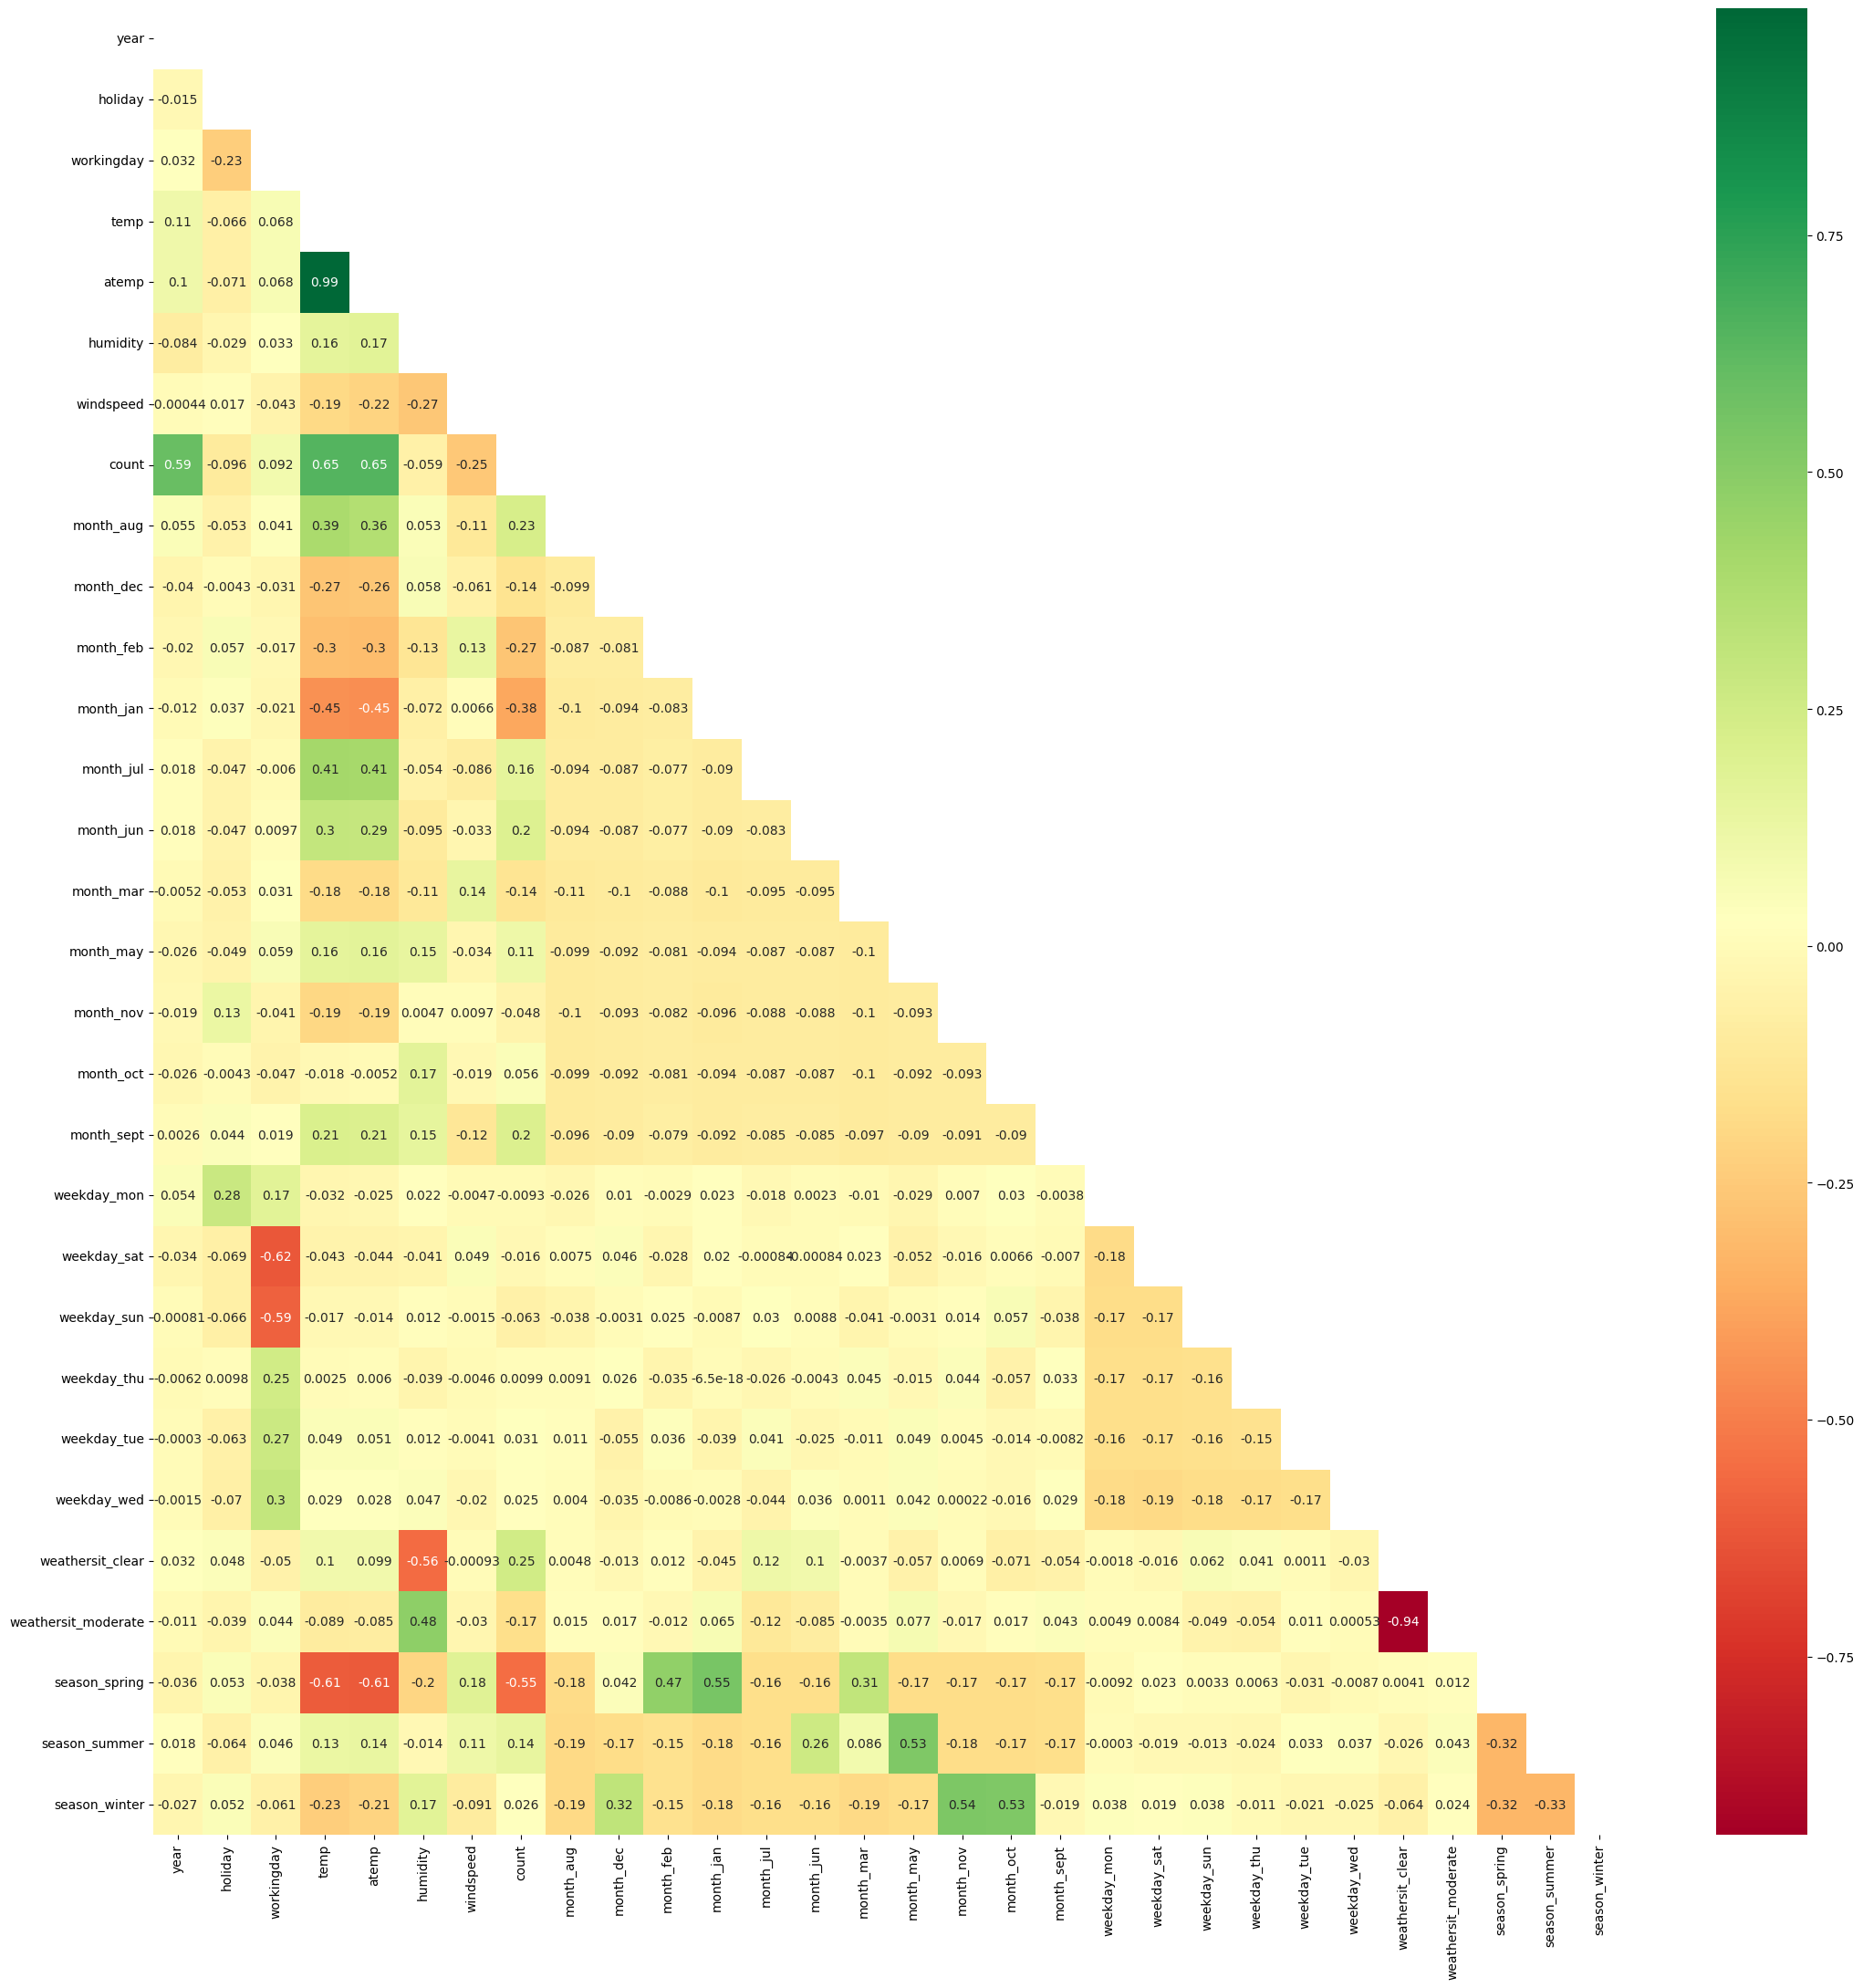

In [ ]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (26,26))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()




important note:
in season winter => oct and nov month show good correlation. (0.53,0.54) respectively
in season summer =>apr and may show good correlation(0.51,0.53) respectively
in season spring => jan is showing good correlation (0.55)
in season fall=> month aug showing good correlation (0.55)

____________________________
count seems to have correlation with year(0.59) variable and temp.
atemp seems to have good correlation with temp (0.99)

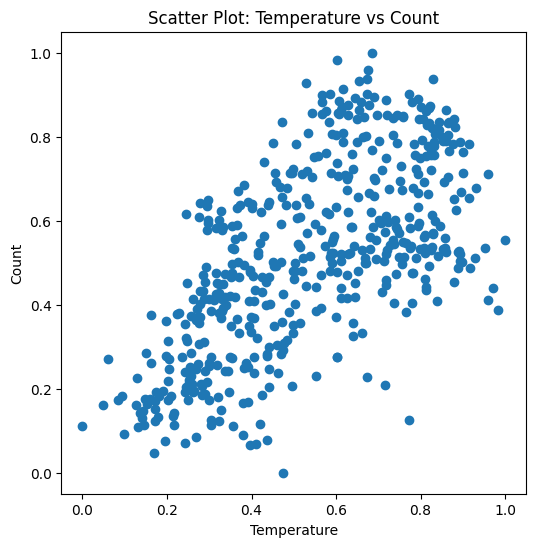

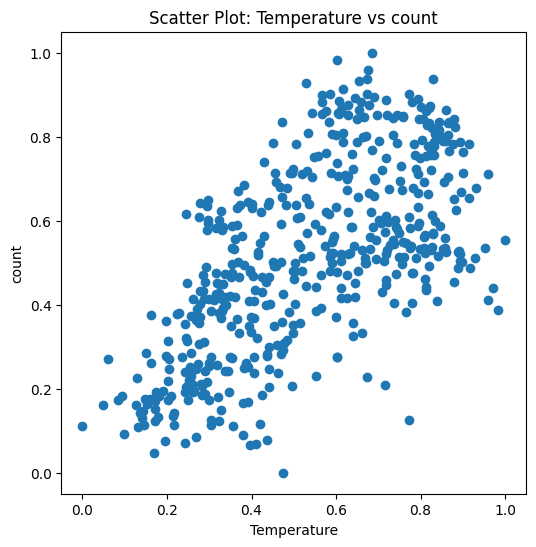

In [ ]:
# Scatter plot for 'temp' vs 'count'
plt.figure(figsize=[6,6])
plt.scatter(df_train['temp'], df_train['count'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Scatter Plot: Temperature vs Count')
plt.show()

# Scatter plot for 'temp' vs 'cnt' if 'cnt' is a different column
if 'count' in df_train.columns:
    plt.figure(figsize=[6,6])
    plt.scatter(df_train['temp'], df_train['count'])
    plt.xlabel('Temperature')
    plt.ylabel('count')
    plt.title('Scatter Plot: Temperature vs count')
    plt.show()

In [ ]:
# Building the Linear Model

y_train = df_train.pop('count')
X_train = df_train

In [ ]:
# Recursive feature elimination


# Step 1: Instantiate and fit the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Step 2: Use RFE with the correct parameters
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

# Checking the selected features
selected_features = rfe.support_
ranking = rfe.ranking_

print("Selected Features:", selected_features)
print("Feature Ranking:", ranking)

Selected Features: [ True  True  True  True False  True  True False False False  True  True
 False False False False False  True False  True False False False False
  True  True  True  True  True]
Feature Ranking: [ 1  1  1  1  5  1  1  7  3  4  1  1 14 15  6  2 13  1  9  1  8 11 10 12
  1  1  1  1  1]


In [ ]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('month_aug', False, 7),
 ('month_dec', False, 3),
 ('month_feb', False, 4),
 ('month_jan', True, 1),
 ('month_jul', True, 1),
 ('month_jun', False, 14),
 ('month_mar', False, 15),
 ('month_may', False, 6),
 ('month_nov', False, 2),
 ('month_oct', False, 13),
 ('month_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 12),
 ('weathersit_clear', True, 1),
 ('weathersit_moderate', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1)]

In [ ]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'month_jan', 'month_jul', 'month_sept', 'weekday_sat',
       'weathersit_clear', 'weathersit_moderate', 'season_spring',
       'season_summer', 'season_winter'],
      dtype='object')


In [ ]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'month_aug', 'month_dec', 'month_feb', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [ ]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [ ]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [ ]:
X_train_rfe.head()

,year,holiday,workingday,temp,humidity,windspeed,month_jan,month_jul,month_sept,weekday_sat,weathersit_clear,weathersit_moderate,season_spring,season_summer,season_winter
576,1,0,1,0.815169,0.725633,0.264686,False,True,False,False,True,False,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,False,False,False,True,False,True,True,False,False
728,1,0,0,0.245101,0.498067,0.663106,False,False,False,False,True,False,True,False,False
482,1,0,0,0.395666,0.504508,0.188475,False,False,False,True,False,True,False,True,False
111,0,0,1,0.345824,0.751824,0.380981,False,False,False,False,False,True,False,True,False


In [ ]:
# X_train_new = X_train_rfe.astype(int)


column_datatypes = {'month_jan':int,	'month_jul':int,	'month_sept':int,	'weekday_sat':int,	'weathersit_clear':int	,'weathersit_moderate':int	,'season_spring':int,	'season_summer':int	,'season_winter':int}

# Convert specific columns to the specified data types
X_train_new = X_train_rfe.astype(column_datatypes)

In [ ]:
# calculate VIF

calculateVIF(X_train_new)

,Features,VIF
4,humidity,25.63
3,temp,22.84
10,weathersit_clear,14.80
11,weathersit_moderate,9.07
12,season_spring,5.69
2,workingday,5.42
5,windspeed,4.69
14,season_winter,4.12
13,season_summer,3.21
0,year,2.10


In [ ]:
X_train_rfe

,year,holiday,workingday,temp,humidity,windspeed,month_jan,month_jul,month_sept,weekday_sat,weathersit_clear,weathersit_moderate,season_spring,season_summer,season_winter
576,1,0,1,0.815169,0.725633,0.264686,False,True,False,False,True,False,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,False,False,False,True,False,True,True,False,False
728,1,0,0,0.245101,0.498067,0.663106,False,False,False,False,True,False,True,False,False
482,1,0,0,0.395666,0.504508,0.188475,False,False,False,True,False,True,False,True,False
111,0,0,1,0.345824,0.751824,0.380981,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,False,False,False,False,True,False,False,False,False
53,0,0,1,0.202618,0.435939,0.111379,False,False,False,False,True,False,True,False,False
350,0,0,0,0.248216,0.577930,0.431816,False,False,False,True,False,True,False,False,True
79,0,0,1,0.462664,0.759870,0.529881,False,False,False,False,False,True,False,True,False


### 6- building linear regression model


In [ ]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          4.22e-191
Time:                        21:11:36   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0044    

In [ ]:
calculateVIF(X_train_new)

,Features,VIF
4,humidity,25.63
3,temp,22.84
10,weathersit_clear,14.80
11,weathersit_moderate,9.07
12,season_spring,5.69
2,workingday,5.42
5,windspeed,4.69
14,season_winter,4.12
13,season_summer,3.21
0,year,2.10


In [ ]:
X_train_new

,year,holiday,workingday,temp,humidity,windspeed,month_jan,month_jul,month_sept,weekday_sat,weathersit_clear,weathersit_moderate,season_spring,season_summer,season_winter
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,1,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,1,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,1,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0,0,0,0,1,0,1,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,0,1,0,1,0,0,1
79,0,0,1,0.462664,0.759870,0.529881,0,0,0,0,0,1,0,1,0


In [ ]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
9,weathersit_clear,14.79
3,temp,13.96
10,weathersit_moderate,8.48
2,workingday,5.34
4,windspeed,4.67
11,season_spring,4.48
12,season_summer,2.79
13,season_winter,2.74
0,year,2.08
8,weekday_sat,1.99


In [ ]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())



                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          1.60e-188
Time:                        21:11:47   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1171    

In [ ]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['month_jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
8,weathersit_clear,14.42
3,temp,13.42
9,weathersit_moderate,8.21
2,workingday,5.33
4,windspeed,4.63
10,season_spring,4.16
11,season_summer,2.78
12,season_winter,2.73
0,year,2.07
7,weekday_sat,1.99


In [ ]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())



                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          1.28e-188
Time:                        21:11:53   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1320    

In [ ]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['month_jul'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
7,weathersit_clear,14.37
3,temp,12.47
8,weathersit_moderate,8.20
2,workingday,5.32
4,windspeed,4.63
9,season_spring,4.02
11,season_winter,2.54
10,season_summer,2.42
0,year,2.07
6,weekday_sat,1.99


In [ ]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())



                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.7
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          3.16e-188
Time:                        21:13:16   Log-Likelihood:                 504.48
No. Observations:                 510   AIC:                            -983.0
Df Residuals:                     497   BIC:                            -927.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1420    

 A p-value of
3.16e-188

  is incredibly small, effectively zero. In statistical hypothesis testing, the p-value represents the probability of obtaining results as extreme as the observed results, assuming that the null hypothesis is true.

In [ ]:
# Checking the parameters and their coefficient values
lr_4.params

const                 -0.142014
year                   0.234246
holiday               -0.054694
workingday             0.047383
temp                   0.478866
windspeed             -0.149169
month_sept             0.089387
weekday_sat            0.058501
weathersit_clear       0.290429
weathersit_moderate    0.209575
season_spring         -0.054272
season_summer          0.062530
season_winter          0.096792
dtype: float64

### 7- Residual Analysis of the train data and validation

In [ ]:
X_train_lm_4

,const,year,holiday,workingday,temp,windspeed,month_sept,weekday_sat,weathersit_clear,weathersit_moderate,season_spring,season_summer,season_winter
576,1.0,1,0,1,0.815169,0.264686,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.255342,0,1,0,1,1,0,0
728,1.0,1,0,0,0.245101,0.663106,0,0,1,0,1,0,0
482,1.0,1,0,0,0.395666,0.188475,0,1,0,1,0,1,0
111,1.0,0,0,1,0.345824,0.380981,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,1,0.863973,0.187140,0,0,1,0,0,0,0
53,1.0,0,0,1,0.202618,0.111379,0,0,1,0,1,0,0
350,1.0,0,0,0,0.248216,0.431816,0,1,0,1,0,0,1
79,1.0,0,0,1,0.462664,0.529881,0,0,0,1,0,1,0


In [ ]:
y_train_pred = lr_4.predict(X_train_lm_4)

####error normality

Text(0.5, 0, 'Errors')

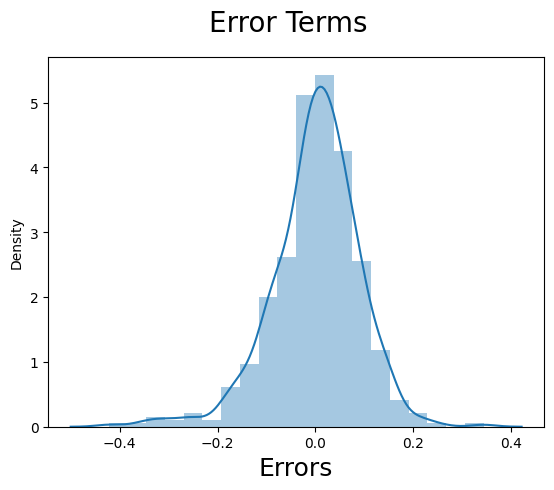

In [ ]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

In [ ]:

calculateVIF(X_train_new)

,Features,VIF
7,weathersit_clear,14.37
3,temp,12.47
8,weathersit_moderate,8.20
2,workingday,5.32
4,windspeed,4.63
9,season_spring,4.02
11,season_winter,2.54
10,season_summer,2.42
0,year,2.07
6,weekday_sat,1.99


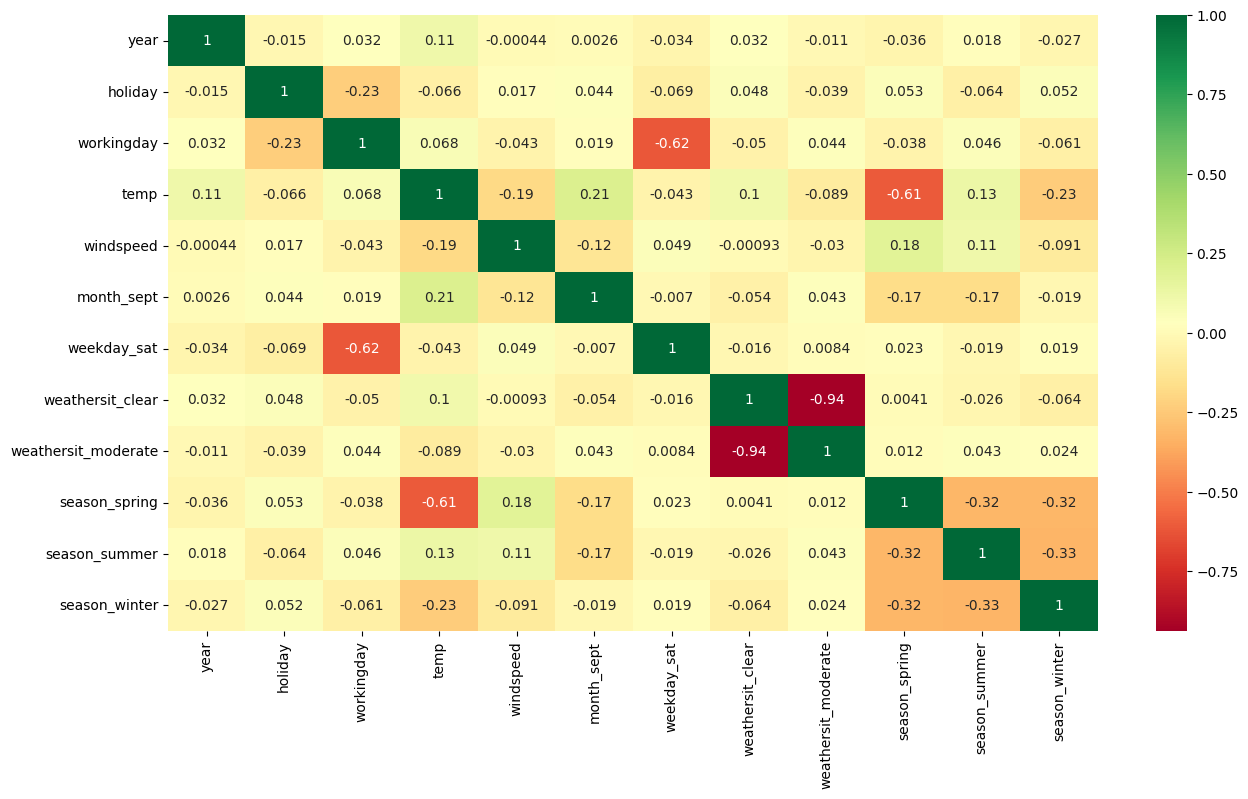

In [ ]:
#Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

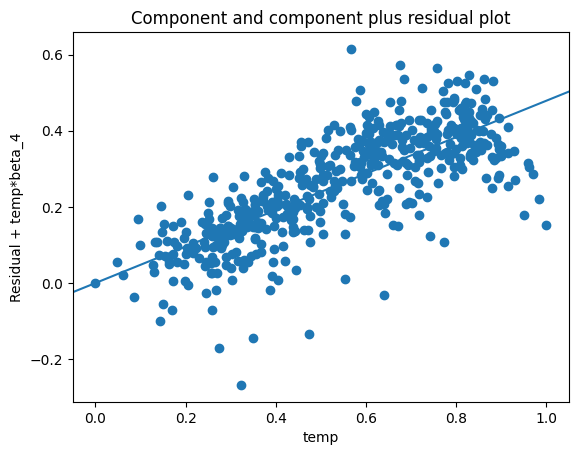

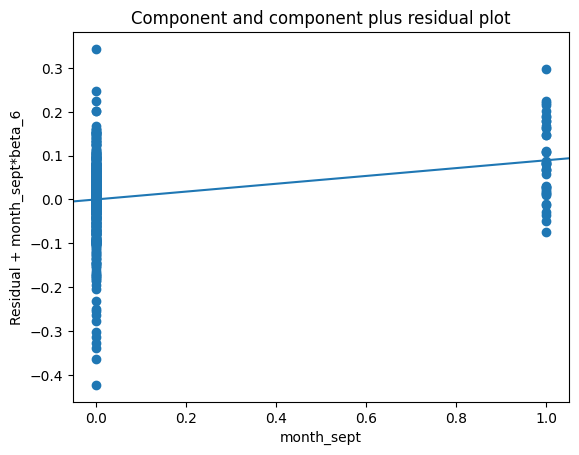

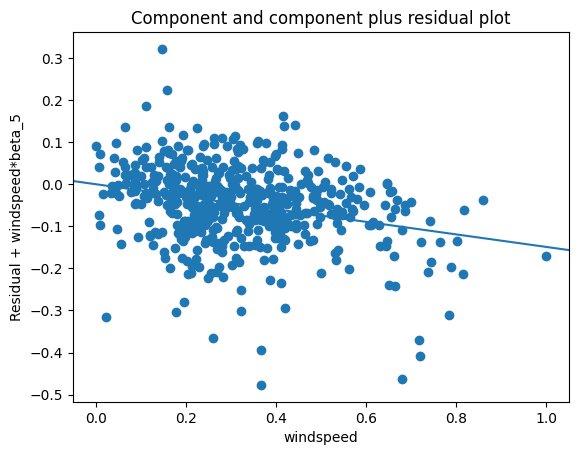

In [ ]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_4, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'month_sept')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'windspeed')
plt.show()

we can observe the plotting of the linearity

In [ ]:
#Homoscedasticity

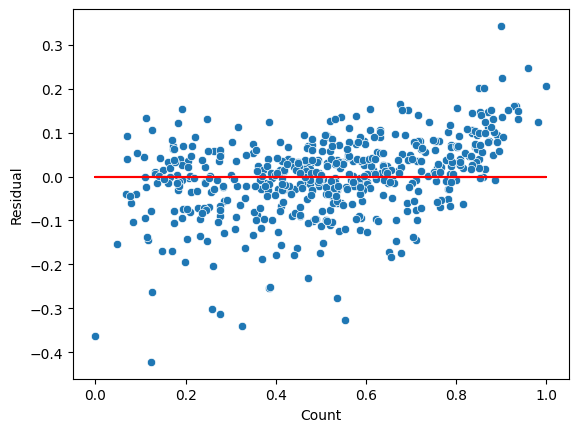

In [ ]:
y_train_pred = lr_4.predict(X_train_lm_4)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train, (y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Independence of residuals

Durbin-Watson: 2.101  which signifies there is no autocorrelation.

### 8- Making Predictions Using the Final Model

In [ ]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','count']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_moderate,season_spring,season_summer,season_winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,False,False,...,False,False,False,False,False,False,True,False,False,False
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,False,False,...,False,False,False,False,True,True,False,False,True,False
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,False,False,...,False,False,True,False,False,False,True,False,False,True
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,True,False,...,False,False,False,False,True,True,False,False,False,False
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,False,False,...,False,False,True,False,False,True,False,False,True,False


In [ ]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [ ]:
y_test = df_test.pop('count')
X_test = df_test

In [ ]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_4 = sm.add_constant(X_test)

In [ ]:
y_pred = lr_4.predict(X_test_lm_4)

In [ ]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8068

9- Model Evaluation

Text(0, 0.5, 'y_pred')

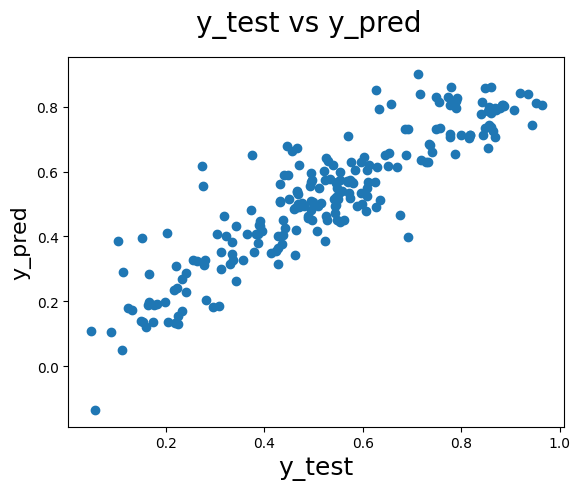

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [ ]:
round(lr_6.params,4)

const                  0.5188
year                   0.2529
holiday               -0.0875
temp                  -0.0000
windspeed             -0.0283
month_sept             0.0716
weekday_sat            0.0101
weathersit_moderate   -0.0725
season_spring         -0.3151
season_summer         -0.0560
season_winter         -0.0945
dtype: float64

In [ ]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7956


In [ ]:
# Calculating Adjusted-R^2 value for the test dataset

trainval = round(1-(1-r2)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),4)
print(trainval)

0.7951


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

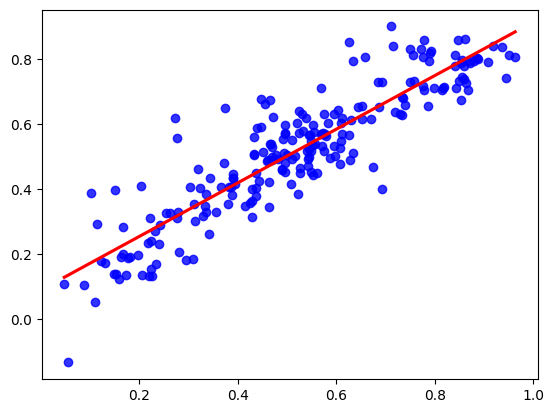

In [ ]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()




in conclusion:
* Test dataset R^2           : 0.806
* Train dataset Adjusted R^2 : 0.7951    
* Test dataset Adjusted R^2  : 0.7956